# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

## Introdução

Neste notebook, foi implementado um algoritmo de Aprendizado de Máquina Supervisionado, ou seja, um algoritmo que, recebendo um determinado conjunto ou uma determinada base de dados, o algoritmo é capaz de aprender as características de diferentes amostras, permitindo-o classificar amostras desconhecidas em dois grupos. Outrossim, as tarefas do algoritmo são as seguintes:

* Dado um conjunto, separar uma porcentagem das tarefas para treinamento do modelo
* Estando o modelo treinado, a porcentagem restante é utilizada para poder validar o funcionamento do modelo, verificando se a capacidade de separação das amostras é válida.
* Concluídas ambas estas etapas e validado o modelo, o mesmo estará pronto para receber amostras aleatórias daqueles dados, de modo a classificá-las com certa acurácia.

In [1]:
# Importando Módulos para Funcionamento
import matplotlib.pyplot as plt
from random import randint, shuffle

from modules.functions import *
from modules.model import *

import pandas as pd
import numpy as np


# Banana BD

In [8]:
banana = pd.read_csv('./data/banana.csv', delimiter=',')

aType = banana[banana['Class'] == 1]
bType = banana[banana['Class'] == -1]

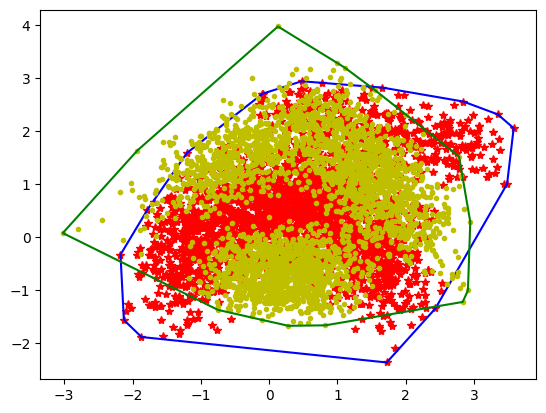

In [9]:
fig, ax = plt.subplots()
plotClass(aType, ax)
plotClass(bType, ax, dotType='y.', envType='g-')


# Iris BD

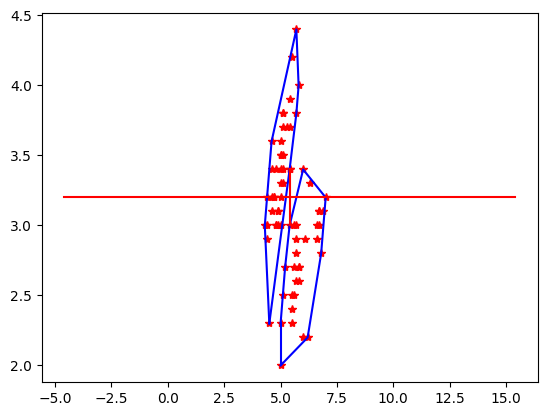

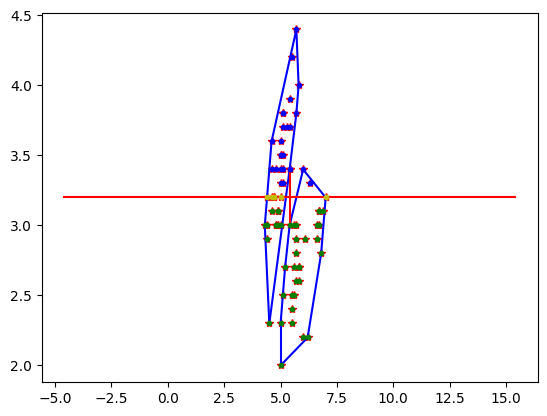

In [31]:
iris = pd.read_csv('./data/iris.csv', delimiter=',')

rotulo = ['Iris-setosa', 'Iris-versicolor']

X_train, X_test, y_train, y_test = test_train(iris, 'Class', rotulo[0], rotulo[1])

filtro = y_train == rotulo[0]

fig, ax = plt.subplots()
plotModel(X_train, ax, filtro, rotulo, withNoise=False, plotEnv=True)
plt.show()

fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, rotulo, withNoise=False)


left = rotulo[0] if firstConvexHullIsLeft else rotulo[1]
right = rotulo[1] if firstConvexHullIsLeft else rotulo[0]

# Classificao Gerada Pelo Nosso Modelo
y = classificacao(X_test, compareCol1=1, compareCol2=2, model=model, whoIsLeft=left, whoIsRight=right)


# wine quality

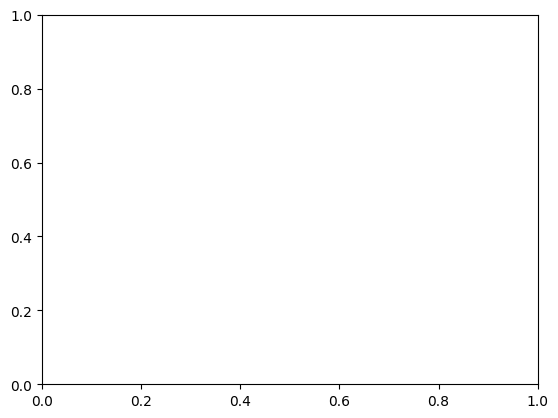

In [11]:
wine = pd.read_csv('./data/winequality-white.csv', delimiter=',')

aType = wine[wine['Quality'] == 4]
bType = wine[wine['Quality'] == 8]

fig, ax = plt.subplots()

col = (aType.shape)[1]
col2 = (bType.shape)[1]

# for i in range(col):
#     for j in range(col2):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         plt.show()

# Thyroid

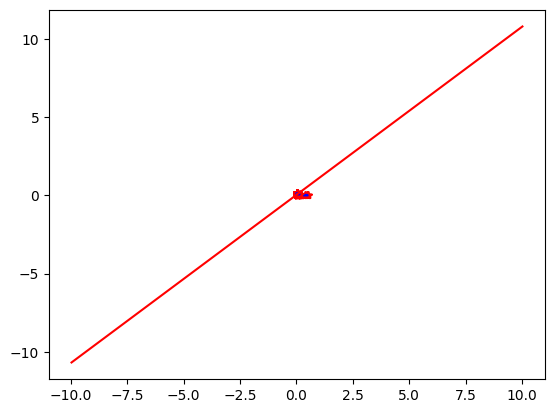

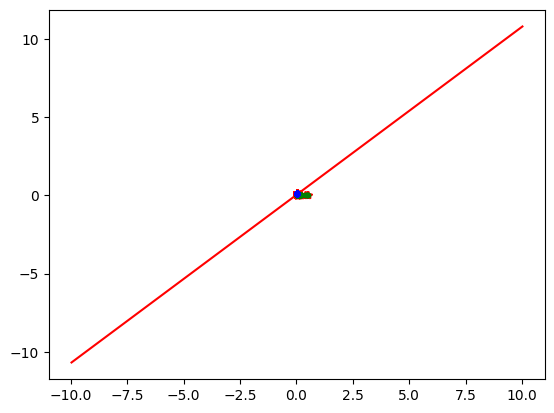

In [33]:
thyroid = pd.read_csv('./data/thyroid.csv', delimiter=',')

aType = thyroid[thyroid['Class'] == 3][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hipo

bType = thyroid[thyroid['Class'] == 2][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # hyper

cType = thyroid[thyroid['Class'] == 1][['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']] # normal

# fig, ax = plt.subplots()

rotulo = [1, 2]

a = 1
b = 5

X_train, X_test, y_train, y_test = test_train(thyroid, 'Class', rotulo[0], rotulo[1])

filtro = y_train == rotulo[0]

fig, ax = plt.subplots()

plotModel(X_train, ax, filtro, rotulo, compareCol1=17, compareCol2=21, withNoise=False, plotEnv=True)

plt.show()

fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, rotulo, compareCol1=17, compareCol2=21, withNoise=False)


left = rotulo[0] if firstConvexHullIsLeft else rotulo[1]
right = rotulo[1] if firstConvexHullIsLeft else rotulo[0]

# Classificao Gerada Pelo Nosso Modelo
y = classificacao(X_test, compareCol1=17, compareCol2=21, model=model, whoIsLeft=left, whoIsRight=right)


# TX_t, 

# plotClass(bType, ax, dotType='yx', envType='g-', compareCol1=a, compareCol2=b, withNoise=False)
# plotClass(cType, ax, dotType='r.', envType='b-', compareCol1=a, compareCol2=b, withNoise=False)




# Phoneme


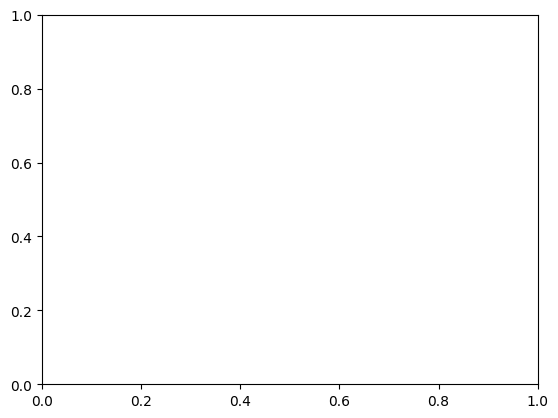

In [13]:
phoneme = pd.read_csv('./data/phoneme.csv', delimiter=',')

aType = phoneme[phoneme['Class'] == 0]
bType = phoneme[phoneme['Class'] == 1]

fig, ax = plt.subplots()

col = (aType.shape)[1]
col2 = (bType.shape)[1]

# for i in range(col):
#     for j in range(col2):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)


# Breast Cancer Wisconsin

In [14]:
cancer = pd.read_csv('./data/wdbc.csv', delimiter=',')

aType = cancer[cancer['Class'] == 'M']
bType = cancer[cancer['Class'] == 'B']

col = (aType.shape)[1]

# for i in range(col):
#     for j in range(col):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)

# plt.show()

# Ionosphere

In [15]:
ionosphere = pd.read_csv('./data/ionosphere.csv', delimiter=',')

aType = ionosphere[ionosphere['Class'] == 'b']
bType = ionosphere[ionosphere['Class'] == 'g']


# fig, ax = plt.subplots()
# a = 24
# b = 15

# plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=a, compareCol2=b)
# plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=a, compareCol2=b)

# plt.show()

aType[['Pulse24', 'Pulse27']]

,Pulse24,Pulse27
1,-0.357,-0.205
2,0.000,0.516
4,0.009,-0.032
6,0.000,1.000
8,0.000,0.206
...,...,...
336,0.178,0.258
337,1.000,1.000
338,1.000,1.000
339,-1.000,1.000


Coil2000

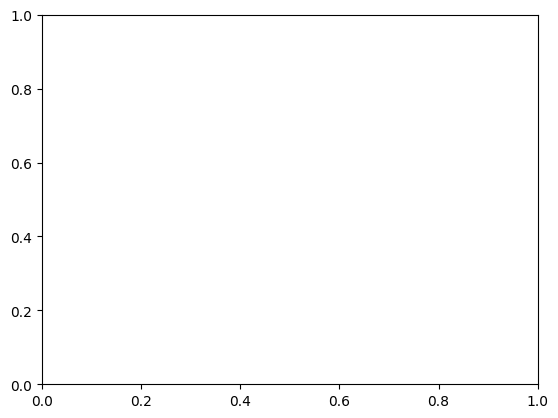

In [16]:
coil2000 = pd.read_csv('./data/coil2000.csv', delimiter=',')

aType = coil2000[coil2000['CARAVAN'] == 0]
bType = coil2000[coil2000['CARAVAN'] == 1]


fig, ax = plt.subplots()

# col = (aType.shape)[1]

# for i in range(col):
#     for j in range(col):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         plt.show()


movement_libras

In [17]:
movement_libras = pd.read_csv('./data/movement_libras.csv', delimiter=',')

aType = movement_libras[movement_libras['Class'] == 1]
bType = movement_libras[movement_libras['Class'] == 12]

# fig, ax = plt.subplots()

# col = (aType.shape)[1]
# col = (bType.shape)[1]

# for i in range(col):
#     for j in range(col2):

#         fig, ax = plt.subplots()
#         plotClass(aType, ax, dotType='rx', envType='r-', compareCol1=i, compareCol2=j)
#         plotClass(bType, ax, dotType='g.', envType='g-', compareCol1=i, compareCol2=j)
#         print(i, j)
#         plt.show()